In [339]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [340]:
DTYPE = np.float32
Array = np.ndarray

In [341]:
X: np.ndarray = np.array([.75, .4], dtype=DTYPE).reshape(2, 1)
t: np.ndarray = np.array([.2, .4], dtype=DTYPE).reshape(2, 1)
I: np.ndarray = np.eye(2, dtype=DTYPE)

In [342]:
# Translation
T: Array = np.concatenate([I, t], axis=1)      # Translation Matrix (2 x 3)
T

array([[1. , 0. , 0.2],
       [0. , 1. , 0.4]], dtype=float32)

In [343]:
X_aug = np.vstack([X, 1.])
X_aug

array([[0.75      ],
       [0.40000001],
       [1.        ]])

In [344]:
X_translated = T @ X_aug        # Translation with MatMul
X_translated

array([[0.95      ],
       [0.80000001]])

In [345]:
X_translated.all() == (X + t).all()     # Same result

True

In [346]:
# Rotation
s: float = 1.
theta: float = 90.

In [347]:
def deg2rad(degree: float) -> float:
    """
    Converts degree to radians.

    Parameters
    ----------
    degree : float

    Returns
    -------
    Degree converted to radians
    """
    return np.multiply(degree, np.pi / 180.)

In [348]:
theta = deg2rad(theta)

X: np.ndarray = np.array([1., 0.], dtype=DTYPE).reshape(2, 1)
t: np.ndarray = np.array([0., 0.], dtype=DTYPE).reshape(2, 1)
X_aug = np.vstack([X, 1.])

R: Array = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
], dtype=DTYPE)

In [349]:
X_rotated = np.concatenate([s * R, t], axis=1) @ X_aug
print(f"Rotated Point X:\n", X_rotated)

Rotated Point X:
 [[6.12323426e-17]
 [1.00000000e+00]]


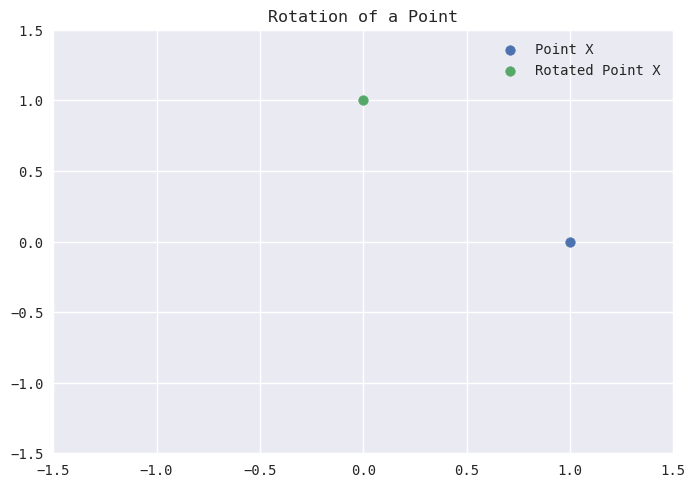

In [350]:
plt.scatter(X[0], X[1], label="Point X");
plt.scatter(X_rotated[0], X_rotated[1], label="Rotated Point X");
plt.title("Rotation of a Point");
plt.legend(loc='best');
plt.xlim([-1.5, 1.5]);
plt.ylim([-1.5, 1.5]);
plt.show()